<img src="https://nds.iaea.org/relnsd/images/iaea.PNG" style="float:left; border-radius:6px">
<div style="margin-top:10px;font-size:22pt;font-weight:bold;">&nbsp;&nbsp; Decay Chain API</div>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='https://nds.iaea.org'><b>IAEA Nuclear Data Section</b></a>
<br>
<br>
<div class="alert alert-block alert-danger">
    This is a <b>test version</b>, please report any feedback to <b>nds.contact-point@iaea.org</b>
</div>

<div class="alert alert-block alert-warning" style="padding:6px; color:rgb(80,80,80)"><b>Warning</b></div>
This API is not suitable for accurate structure and decay analysis, and numeric data should be taken cum grano salis. 
<br>
Here some issues to be considered: 
<ul>
<li>    
Uncertainties: there are decays for which the branching ratio is given as, e.g,   < 30&percnt; . Accepted practice is to convert them as  15% &plusmn; 15. This allows numerical calculations, but it needs careful consideration when interpreting the results.  
</li>
<li>     
Radiation energies and intensities, and decay branching ratios, might not have the same values across different ENSDF datasets, particularly, but not exclusively, in case of alpha decays
</li>
<li>     
Some metastable energies are not known, e.g. the Pa-234m in U-238 decay chain
</li>
    </ul>

For accurate Structure and Decay analysis, please refer to the  <a href="https://www.nndc.bnl.gov/ensdf/evalcorner/"> ENSDF</a> database and its policies, and to the <a href="https://www.sciencedirect.com/journal/nuclear-data-sheets"> Nuclear Data Sheets</a> journal


<span style="text-decoration:underline">For the full documentation of the API, check its</span> <a href="https://www-nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html"> guide</a>

<div class="alert alert-block alert-success" style="font-weight:bold">
Requirements    
</div>
<ul>
<li>
<b>pandas</b> (<a href='https://pandas.pydata.org/docs/getting_started/install.html'>detailed info</a>, or just <code>pip install pandas</code>)
</li>
<li>
<b>batemaneq</b> (<a href ='https://pypi.org/project/batemaneq/'> detailed info</a> , or just <code>pip install batemaneq</code>)
</li>
<li>
<b>matplotlib</b>
</li>
<li>
  <b>Optional</b>    <a href='http://plotly.com'> Plotly</a>, a package for interactive data visualization, here how to get it work with <a href='https://plotly.com/python/getting-started/#jupyterlab-support'>  jupyter lab</a>
<br>
In short :
<code>
$ pip install plotly
$ pip install ipywidgets
$ jupyter labextension install jupyterlab-plotly
</code>
</li>
</ul>

<div class="alert alert-block alert-success" style="font-weight:bold">
Examples overview
</div>
This API allows the qualitative analysis of decay chains, like :
<br><br>
<b>Decay chain plot</b>

<img src='./docs/99mo.png' style='height:400px; margin-right:20px;'>
Plese note that for producing this plot, some code from <a href='https://github.com/radioactivedecay/radioactivedecay>'><b>radioactivedecay</b></a> has been adopted.
<br><br>
<b> Decay radiation intensity build-up</b>
<br>
In the case above, there are three paths to reach the ~89.5 keV photon emitted when reaching Ru-99. The API gives the 
intensity vs time build-up of each, as well as the overall sum
<br>

<div style='float:left;clear:left'>
<b>Mo-99 &rarr; Tc-99 &rarr; Ru-99</b><br>
<img src='./docs/99MO_0 99TC_0.svg' style='height:200px;margin-left:-30px'>
</div>
<div  style='float:left'>
<b>Mo-99 &rarr;Tc-99m &rarr; Ru-99</b><br>
<img src='./docs/99MO_0 99TC_2.svg' style='height:200px;margin-left:-30px'>
</div>
<div  style='float:left'>
<b>Mo-99 &rarr;Tc-99m &rarr; Tc-99 &rarr; Ru-99</b><br>
<img src='./docs/99MO_0 99TC_2 99TC_0.svg' style='height:200px;margin-left:-30px'>
</div>
<div  style='float:left;clear:right'>
<b>Sum &gamma; ~89.5keV </b><br>
<img src='./docs/Sum.svg' style='height:200px;margin-left:-30px'>
</div>

<div  style='clear:both'>
<b> Nuclide population and most intense emission vs time</b>
<br>
<img src='./docs/btm.svg' style='width:450px; float:left'>
<img src='./docs/mil.svg' style='width:450px; float:left'>

<div  style='clear:both'>
More examples are given below
<br>
<br>
</div>
<div class="alert alert-block alert-success" style="font-weight:bold">
Decay Chain overview
    </div>
Consider the decay of Mo-99 reaching Ru-99.
<br><br>
<img src='./docs/mo99.png' style='height:200px;float:left; margin-right:20px'>

There are three chains, with these link sequences: 
<br>
1 &rarr; 3
<br>
1 &rarr; 4 &rarr; 5
<br>
2 &rarr; 6
<br>
Although the links 5 and 6 have same branching ratio for one decay of Tc-99, they have
different branching ratios  for one decay of Mo-99, and will
be traversed at different times. The API returns one line for each link, including these chain-related data

<br><br>

<b>If you are not interested in coding, or how the API works</b>, you can just execute the cells with code ([1] and [2]), and go  to the examples in the following cells:

- <code>[3]</code> decay chain plotting
- <code>[4]</code> decay radiations Energy vs. Intensity 
- <code>[5]</code> decay chain analysis link by link
- <code>[6]</code> bateman solution, summing over all the chains
- <code>[7]</code> radiation intensities grouped by parent, summing over all the chains
- <code>[8]</code> radiation intensities grouped by daughter, summing over all the chains



<div class="alert alert-block alert-success" style="font-weight:bold">
API call and data returned
    </div>

Call the api with **fields=decay_chain** and **nuclides=99mo** as below
```python
lc_pd_dataframe('fields=decay_chain&nuclides=99MO')
```
<div class="jp-RenderedHTMLCommon jp-RenderedHTML jp-OutputArea-output jp-OutputArea-executeResult" data-mime-type="text/html">
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>idx</th>
      <th>ancestor_idxs</th>
      <th>ancestor_full_ids</th>
      <th>par_full_id</th>
      <th>par_nucid</th>
      <th>par_lev</th>
      <th>par_z</th>
      <th>par_a</th>
      <th>par_energy</th>
      <th>par_energy_shift</th>
      <th>...</th>
      <th>dau_energy</th>
      <th>dec_type</th>
      <th>par_half_life</th>
      <th>par_half_life_unc</th>
      <th>dau_half_life</th>
      <th>dau_half_life_unc</th>
      <th>chain_br</th>
      <th>chain_br_unc</th>
      <th>decay_br</th>
      <th>decay_br_unc</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0</td>
      <td>99MO_0</td>
      <td>99MO_0</td>
      <td>99MO</td>
      <td>0</td>
      <td>42</td>
      <td>99</td>
      <td>0.0000</td>
      <td>NaN</td>
      <td>...</td>
      <td>142.6836</td>
      <td>B-</td>
      <td>2.373264e+05</td>
      <td>2.160000e+01</td>
      <td>2.162592e+04</td>
      <td>3.240000e+00</td>
      <td>0.877800</td>
      <td>0.004090</td>
      <td>0.877800</td>
      <td>0.004090</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>0</td>
      <td>99MO_0</td>
      <td>99MO_0</td>
      <td>99MO</td>
      <td>0</td>
      <td>42</td>
      <td>99</td>
      <td>0.0000</td>
      <td>NaN</td>
      <td>...</td>
      <td>0.0000</td>
      <td>B-</td>
      <td>2.373264e+05</td>
      <td>2.160000e+01</td>
      <td>6.661667e+12</td>
      <td>3.786831e+10</td>
      <td>0.122200</td>
      <td>0.004090</td>
      <td>0.122200</td>
      <td>0.004090</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>0 1</td>
      <td>99MO_0 99TC_2</td>
      <td>99TC_2</td>
      <td>99TC</td>
      <td>2</td>
      <td>43</td>
      <td>99</td>
      <td>142.6836</td>
      <td>NaN</td>
      <td>...</td>
      <td>0.0000</td>
      <td>B-</td>
      <td>2.162592e+04</td>
      <td>3.240000e+00</td>
      <td>-1.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000032</td>
      <td>0.000005</td>
      <td>0.000037</td>
      <td>0.000006</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>0 1</td>
      <td>99MO_0 99TC_2</td>
      <td>99TC_2</td>
      <td>99TC</td>
      <td>2</td>
      <td>43</td>
      <td>99</td>
      <td>142.6836</td>
      <td>NaN</td>
      <td>...</td>
      <td>0.0000</td>
      <td>IT</td>
      <td>2.162592e+04</td>
      <td>3.240000e+00</td>
      <td>6.661667e+12</td>
      <td>3.786831e+10</td>
      <td>0.877770</td>
      <td>0.004090</td>
      <td>0.999963</td>
      <td>0.000006</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>0 1 4</td>
      <td>99MO_0 99TC_2 99TC_0</td>
      <td>99TC_0</td>
      <td>99TC</td>
      <td>0</td>
      <td>43</td>
      <td>99</td>
      <td>0.0000</td>
      <td>NaN</td>
      <td>...</td>
      <td>0.0000</td>
      <td>B-</td>
      <td>6.661667e+12</td>
      <td>3.786831e+10</td>
      <td>-1.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.877770</td>
      <td>0.004090</td>
      <td>1.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6</td>
      <td>0 2</td>
      <td>99MO_0 99TC_0</td>
      <td>99TC_0</td>
      <td>99TC</td>
      <td>0</td>
      <td>43</td>
      <td>99</td>
      <td>0.0000</td>
      <td>NaN</td>
      <td>...</td>
      <td>0.0000</td>
      <td>B-</td>
      <td>6.661667e+12</td>
      <td>3.786831e+10</td>
      <td>-1.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.122200</td>
      <td>0.004090</td>
      <td>1.000000</td>
      <td>0.000000</td>
    </tr>
  </tbody>
</table>

</div>
</div>

Each line describes one of the links in the picture above:


**idx** is a unique identifier of the row

<div> <b>par_*</b> fields refer to the parent</div>

&nbsp;&nbsp;&nbsp; <b>par_lev</b> is the sequential number of the level in the ENSDF database:  0 for the Ground State, >0 for a metastable state
<br>
&nbsp;&nbsp;&nbsp; <b>par_energy</b> gives the energy of the state:  0 for the Ground State, >0 for a metastable state
<br>
&nbsp;&nbsp;&nbsp; <b>par_full_id</b> concatenates the par_nucid and par_lev fields, giving a unique id for the state
<br>
&nbsp;&nbsp;&nbsp; <b>par_energy_shift</b> is 1 if the level energy has an unknown shift ('+X' in the ENSDF evaluation ). This is the case for  Pa-234m in the U-238 chain.

<b>dau_*</b> fields refer to the daughter, with similar meaning as the ones for the parent
<br><br>
<b>chain_br</b> gives the probability of this link being traversed for one decay of the ancestor 
<br>
<b>decay_br</b> gives the probability of this parent-daughter decay per one decay of the parent
<br><br>
<b>ancestor_full_ids</b> lists all the ancestors leading to this link
<br>
<b>ancestor_idxs</b> lists the ids of the previous links. It is the field that allows to find the other links of the decay chain

<span style="text-decoration:underline">For the full documentation of the API, check its</span> <a href="https://www-nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html"> guide</a>

<div class="alert alert-block alert-success" style="font-weight:bold">
Coded examples    
</div>

The main objective is to show how to use the *ancestor_idxs* field to reconstruct the decay chain, and to proper calculate branching ratios, nuclides' population, and radiation intensities. It will be show how to link these API with the overall set of API <a href='https://www-nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html'>already available</a> 


**External software**
<br>
&bull; <a href ='https://pypi.org/project/batemaneq/'> batemaneq</a>, to solve the bateman equation, needs to be installed
<br>
&bull; The code for decay chain plotting is adapted from
<a href='https://github.com/radioactivedecay/radioactivedecay>'>radioactivedecay</a>


The first set of functions below is just convenience for plotting, then there is a set of parameters to customise the analysis. <br> Then starts the code that does the job.  
<br>
In the case of Mo-99, Ru-99 is reached by three different chains. If one wants to have, for example, the overall build-up of Ru99, or the intensity of the radiation emitted,  one must sum the contribution of each chain.
<br>
For this purpose, the function <code>fill_storage</code> is called each time a nuclide is reached; it sums and saves the relevant quantities in a dictionary. There are two storages, one summing by daughter, and one summing by parent. The latter
allows to tell how much radiation is emitted by, e.g., the decay of Tc-99 vs Tc-99m. 



In [1]:
import urllib.request
import pandas as pd

from batemaneq import bateman_parent 
from math import log as ln

import matplotlib.pyplot as plt
from decimal import Decimal
import re
import sys

try:
    import plotly.express as px
    import plotly.graph_objects as go
    # remember if plotly is loaded
    PLOTLY = True
except:
    # if not, use matplotlib
    PLOTLY = False


plt.rcParams["figure.figsize"] = (10,4)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#  API call, returns a pandas dataframe
def lc_pd_dataframe(url):
    try:
        livechart = "https://nds.iaea.org/relnsd/v1/data?"
        url = livechart + url
        req = urllib.request.Request(url)
        req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
        return pd.read_csv(urllib.request.urlopen(req))
    except:
        return pd.DataFrame()


# label for time units
def time_label(delta_t):
    return  'Centuries' if delta_t == centuries else 'Years' if delta_t == years else'Months' if delta_t == months else 'Days' if delta_t == days else 'Hours' if delta_t == hours else 'Minutes'

#  Format chain info 
def chain_desc(row):
        ret =  ( row['ancestor_full_ids'].replace('_0','').replace(' ', ' -> ')  +' -> '+row['dau_full_id'].replace('_0','')  + '\tBranching ratio ' + str(row['chain_br']))
        ret = re.sub('_+[\d]+', 'm', ret)
        return ret

# labels for plotly
def display_fig(fig, title, xlabel,ylabel):
    fig.update_layout(title=title)
    fig.update_yaxes(title_text=ylabel)
    fig.update_xaxes(title_text=xlabel)
    return fig


def plotly_matplotlib(x, y, dau, anc, par, par_half_life, delta_t, rad_type, energy):
    '''
    Generates a plot, with Plotly if present, or with matplotlib 
    Parameters
    ----------
    x, y are the lists with plottled values, the rest is for labelling 
    '''
    
    if(energy == 0): return None
     
    h_l =  "{:.2E}".format(Decimal(str(par_half_life)))
    y_label = "Counts per 100 decays of " + anc.split(' ')[0].replace('_0','').replace('_2','m')    
    rad = 'gamma' if rad_type == 'g' else 'alpha' if rad_type == 'a' else 'radiation'
    rad = rad_type
    title =  "   " + par + " --> " + dau + ", " + rad + "@" + str(energy) +" keV  T1/2 [s] " + h_l 
    x_label = time_label(delta_t)
   
    if(PLOTLY):
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=x, y=y, mode="lines"))
        fig.update_layout( title=title)
        fig.update_layout(width=100)

        fig.update_xaxes(title_text=x_label)
        fig.update_yaxes(title_text=y_label)
        #fig.update_xaxes(type="log")
        #fig.update_yaxes(type="log")
        fig.show()
        
        return fig
    else:
        plt.plot(x, y)
        plt.title(title,fontsize = 20)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        #fig1 = plt.gcf()
        plt.show()
       
        #fig1.savefig(anc + ".svg" , format="svg")
        return plt

# from seconds to years, for the bateman solver
to_years = 1.0/365/60/3600

# conversion from years, for plotting
centuries = 0.001
years = 1.
months = 12.
days = 365.
hours = 365.*24.
minutes = 365.*24.*60
seconds = 365.*24.*60*60

#######
# parameters that can be overwritten case by case
#######

# for plotting, choose a suitable delta time (e.g. months for U-238, hours or minutes for Mo-99)
delta_t = hours
tot_intervals = 40

# cut-off for irrelevant decay chains 
branching_ratio_threshold = "1.E-9"
# radiation type to be analysed
radiation_type = 'g'
# radiation energy-range of interest (keV)
energy_low = 0
energy_up = 10000

# store the results in case of further use
# intensities summed by parent
#storage = {}
# intensities summed by daughter
#storage_by_dau = {}

def fill_storage(full_id, intensity, bateman, energy, storage):
        '''
        Fills a dictionary with nuclides' population and timeline of
        the main radiation, summed over all the chains


        Example
        -------
         {'238U_0': {'intensities': [...],
                                'bateman': [...],
                                'energy': ...},
                     ...
                    },
          'times': [...]
          }


           'energy' is the energy of the radiation,
           'intensities' is the intensity timeline of the radiation per 1 decay of the head of the chain
           'bateman' is the population timeline of the given nuclide per 1 decay of the head of the chain
           'times' are the times at which the values are taken.
           Then 'intensities', 'bateman', and 'times' are lists with the same length

        Parameters
        ----------
        full_id: str
                 full id of the nuclide_level e.g 99TC_2, where 2 is the sequential number of the level (0 for GS)
        intensity: list
                 intensity timeline of the radiation in this chain
        bateman: list
                 population timeline of the given nuclide in this chain
        energy: float
                 the energy of the radiation
        storage: dictionary
                 the 'parents' or 'daughter' dictionary to be filled

        '''
        # sum over the other chains if the storage is not empty
        if(full_id in storage):
            storage[full_id]['intensities'] = [x+y for x,y in zip(intensity, storage[full_id]['intensities'] )] if not (intensity is None) else storage[full_id]['intensities']
            storage[full_id]['bateman'] = [x + y for x,y in zip(bateman, storage[full_id]['bateman'] )]
        # if it is the first chain, create
        else :
            storage[full_id] = {}
            storage[full_id]['intensities'] = intensity if not (intensity is None) else [0 for i in range(len(bateman)) ]
            storage[full_id]['bateman'] =  [x for x in bateman]
            storage[full_id]['energy'] = energy

        return storage

def most_intense_rad(par_nucid, par_energy, dau_z):
    '''
    intensity and energy of the most intense line of 'radiation_type'
    
    Parameters
    ----------
    par_nucid: str 
               nucid of the parent of the decay, e.g. 99MO
    par_energy: float
                energy of the parent level that decays ( 0. for ground state)
    dau_z: int
           z of the daughter of the decay
           
    Global parameters
    -----------------
    radiation_type: type of the radiation, one of 'a','g','x','bp','bm'
    energy_low, energy_up: energy range of the radiation
    
    Returns
    -------
    list: [intensity, energy]
    
    '''
    
    df_rad = lc_pd_dataframe('fields=decay_rads&nuclides='+ par_nucid +'&rad_types='+radiation_type)  
    if(df_rad.empty): return [0,0]

    df_rad = df_rad.query('p_energy==' + str(par_energy))
    df_rad = df_rad.query('d_z==' + str(dau_z)).query('energy >' + str(energy_low)).query('energy <' + str(energy_up))
    df_rad = df_rad.sort_values(by='intensity', ascending=False).dropna(subset=['intensity'])
    
    if(df_rad.empty): return [0,0]
    
    return [df_rad.iloc[0]['intensity'], df_rad.iloc[0]['energy']]

def bateman_timeline(half_lives, delta_t, tot_intervals, chain_br):
    '''
    Nuclides' population timeline on a given chain
    Uses https://pypi.org/project/batemaneq/ to solve the equation
    

Parameters
    ----------
    half_lives: list
              the list with the half_lives (in years) of the nuclides composing the chain
    delta_t: float
              the time lapse between two calculation (seconds, minutes, ... , centuries expressed in years)
    tot_intervals: int
              how many times slices are calculated
    chain_br; float
              the normaization (the overall branching ratio of the chain )
    
    Returns:
    --------
    A matrix where each row is the time evolution of a nuclide
    The values are normalised to the overall branching ratio of the chain
    
    '''
    
    times = list(range(tot_intervals))
    bateman = []
    
    # [nuc[0]t[0] , ..., nuc[n]t[0]
    # [...]
    # [nuc[0]t[end] , ..., nuc[n]t[end]]
    for i in range(tot_intervals):
        bmp = bateman_parent([ln(2)/x for x in half_lives], i/delta_t) 
        bmp = [chain_br*x for x in bmp]
        bateman.append(bmp)
        
    # transpose
    # nuc[0]t[0] , ..., nuc[0]t[end]
    # ...
    # nuc[n]t[0] , ..., nuc[n]t[end]    
    return {'bateman': list(map(list, zip(*bateman))) , 'times':times}


def chain_ends(df_all, end_full_id = None):
    '''
    All the possible decays having as daughter the given nuclide
    
    Parameters
    ----------
    df_all: pandas dataframe
            API data 
    full_id: str
             full id of the daughter nuclide e.g. 99TC_0, or None is the stable end of the chain
    Returns
    -------
        The dataframe with only the dacys leading to the considered daughter

    '''
    
    if(end_full_id != None):
        df_ends = df_all.query('dau_full_id=="'+ end_full_id +'"')
        if(df_ends.empty): print('Daughter ' + end_full_id + ' not found in the chain')
    else:
        
        # take the end links (stable daughter)
        try:
            df_ends = df_all.query("dau_half_life==-1")
            if(df_ends.empty):
                 df_ends = df_all.query("float(dau_half_life)==-1")    
        except:
            df_ends = df_all.query("dau_half_life=='-1'")

        if(df_ends.empty):
            print(' No stable nuclides at the chain-end for ' + start_nucid)
    return df_ends

 
            
def process_nuclide(start_nucid, plot, storage, storage_by_dau, end_full_id = None):
    '''
    Given a nuclide, follows its decay chain and the emitted radiations.
    
    The population timeline for each chain is calculated, as well as the sum
    over all chains.
    
    The the timeline of most intense radiation for each decay is calculated.
    Intensities are also grouped and summed by daughter (when a nuclide
    is reached by different chains), to construct the observed intensity timeline.
    WARNING: the sum assumes that when a nuclides is reached by different chains,
    the energy of the most intense radiation is the same. This might not be always
    the case.
    For example, the Mo99 reached Ru99 from two chains, both emitting 89.6 keV photon.
    But in the U238 chain Tl206 can be reached from Hg206 and Bi210, with different
    main energies. One needs to modify this function to take this into consideration
    
 
    Quantities named br (branching ratio) are normalised per 1 decay of the 1st nuclide
                     intensity are normalised per 100 decays of the 1st nuclide

    Parameters
    ----------
    start_nucid: str
        the ancestor, e.g. 99MO
    plot: bool
        whether to plot the intensities
    storage: dictionary
         data structure grouping data by parent, filled in fill_storage
    storage: dictionary
         data structure grouping data by daughter, filled in fill_storage
    end_full_id: str
        nuclide+level until which the chain is followed, e.g. 99TC_2
        None, to reach the stable nuclide
    '''
    # df with all decays (links) in all chains
    df_all = lc_pd_dataframe('fields=decay_chain&nuclides=' + start_nucid)
    if(df_all.empty):
        print(' No data for ' + start_nucid)
        return
    # filter the links (decays) leading to the selected daughter (or the stable at the end),
    # each of them is from a different chain. 
    df_ends = chain_ends(df_all, end_full_id)
    if(df_ends.empty): return
    
    df_ends.sort_values(by='chain_br', ascending=False)

    # check the accuracy: the sum of the end links branching ratios should be 1
    # (actually only for a nuclide included in all chains)
    print("Normalization check", df_ends['chain_br'].sum(),'\n')

    print(len(df_ends.index), ('chains' if len(df_ends.index) > 1 else 'chain'))
    for index, row in df_ends.iterrows(): print("*", chain_desc(row))

    # if a branching ratio threshold is given, remove chains below that treshold
    df_ends = df_ends.query("chain_br>" + branching_ratio_threshold).sort_values(by='chain_br',ascending=False)
    print('\n')

    # loop over the decays leading to the end nuclide
    for index, link in df_ends.iterrows():
        print('*',chain_desc(link))
    
        # get all the links composing the chain.
        # construct the filter:
        # this link (the chain-end):
        qry = 'idx==' + str(link['idx'])
        # add all the previous ones. the 'ancestor_idxs' fields has the indexes 
        ancestors = link['ancestor_idxs'].split(' ')
        for p in ancestors: qry =  "idx=="+p if qry == '' else qry + ' | ' + "idx=="+p

        # df_links contains the decays of this chain, up to 'link'
        df_links = df_all.query(qry).sort_values(by='idx')
        
        # the list with the Half-lives of the parents in this chain (converted from seconds to years)
        half_lives = [ float(x) * to_years for x in df_links['par_half_life'].to_list()]
        # add the h-l of the last daughter
        dau_hl = (link['dau_half_life'] if link['dau_half_life'] != -1 else float("inf")) * to_years
        half_lives.append(dau_hl)
        
        # the matrix with nuclides' population timeline. Each row has the timeline for a nuclide
        b_tl = bateman_timeline(half_lives, delta_t, tot_intervals, link['chain_br'])

        # for each decay, get energy and intensity of the most intense radiation (of type 'radiation_type')
        # the intensity is pre 100 decays of the parent, and will need renormalization
        intensities_energies = [most_intense_rad(x, y, z) for x, y, z in df_links[['par_nucid', 'par_energy', 'dau_z']].to_numpy() ]
        # re-normalise the intensities using the population of the parent, stored in btl 
        n_intensities = [ [x*b for b in b_tl['bateman'][idx]] for idx, x in enumerate([row[0] for row in intensities_energies ])]

        # for each link (parent-daughter decay) plot the timeline of the most intense line,
        # then sum the timelines 
        # these are just for labels
        d_fid = df_links['dau_full_id'].tolist()
        a_fid = df_links['ancestor_full_ids'].tolist()
        p_fid = df_links['par_full_id'].tolist()

        # loop on each link. row[1] is the energy of the radiation emitted
        for i, e in enumerate([row[1] for row in intensities_energies]):
            if(plot): plotly_matplotlib(b_tl['times'], n_intensities[i], d_fid[i],a_fid[i],p_fid[i] , half_lives[i], delta_t, radiation_type, e)
            # sum and save the intensities grouping by daughter
            fill_storage(p_fid[i], n_intensities[i], b_tl['bateman'][i], e, storage)     
            fill_storage(d_fid[i], n_intensities[i], b_tl['bateman'][i], e, storage_by_dau)     
        
        fill_storage(d_fid[-1], None, b_tl['bateman'][-1], 0, storage)

        storage['times'] = b_tl['times']


<div class="alert alert-block alert-warning" style="padding:6px; color:rgb(80,80,80)"><b>Warning</b></div>

Here below the code that adapts software from <a href='https://github.com/radioactivedecay/radioactivedecay>'><b>radioactivedecay</b></a> and plots decay chains. Just execute the cell and go to the next to test it

In [2]:
from collections import deque
from typing import Any, Dict, List, Optional, Tuple, Union

import matplotlib
import networkx as nx
import numpy as np

def check_fig_axes(  # type: ignore
    fig_in: Optional[matplotlib.figure.Figure],
    axes_in: Optional[matplotlib.axes.Axes],
    **kwargs,
) -> Tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]:
    

    if fig_in is None and axes_in is None:
        fig, axes = plt.subplots(**kwargs)
    elif fig_in is None:
        axes = axes_in
        fig = axes.get_figure()
    elif axes_in is None:
        fig = fig_in
        axes = fig.gca()
    else:
        fig = fig_in
        axes = axes_in

    return fig, axes



def load_half_life(nuclide):
   
    state = nuclide.split("_")[1]
    nucid = nuclide.split("_")[0]
    df_level = lc_pd_dataframe('fields=levels&nuclides=' + nucid )
 
    half_life = str(df_level.query('idx=='+state).iloc[0]['half_life'])

    if(half_life == 'nan' ): 
        return '?'
    if ( half_life != 'STABLE'):
        if(len(str(half_life)) > 6):
            half_life = np.format_float_scientific(float(half_life)).replace('+0','+')
        half_life = half_life + ' ' + df_level.query('idx=='+state).iloc[0]['unit_hl'] 
      
    else:
        half_life = 'Stable'
    return half_life


class Nuclide:
   
    def __init__(
        self, nuclide : str, decay_data: pd.DataFrame
    ) -> None:
        self.decay_data = decay_data
        self.nuclide = nuclide
        self._mydata = decay_data.query("par_full_id=='" + nuclide + "'")
        self._prefix = 'par'
        if(self._mydata.empty):
            self._mydata = decay_data.query("dau_full_id=='" + nuclide + "'")
            self._prefix = 'dau'
        self._mydata.sort_values(by='chain_br', ascending=True)
      
        self.Z = self._mydata.iloc[0][self._prefix + '_z']
        self.A = self._mydata.iloc[0][self._prefix + '_a']
      
        self.state = self.nuclide.split("_")[1]
        self.nucid = self.nuclide.split("_")[0]
        self.id = nuclide
        self.label = nuclide.replace('_0','')
        self.label = re.sub('_+[\d]+', 'm',  self.label)
        self._half_life = None
       
    def half_life(self, units: str = "s") ->  str:
        if(self._prefix == 'dau'): return 'Stable'
        return self._mydata.iloc[0][self._prefix + '_half_life']
    
    def half_life_hr(self, units: str = "s") ->  str:
        if(self._half_life == None):
            self._half_life = load_half_life(self.nuclide)     
        return self._half_life

    def progeny(self) -> List[str]:
        return self._mydata['dau_full_id'].to_list()

    def branching_fractions(self) -> List[float]:
        return self._mydata['decay_br'].to_list()

    def decay_modes(self) -> List[str]:
        return self._mydata['dec_type'].to_list()

    def plot(
        self,
        label_pos: float = 0.5,
        fig: Optional[matplotlib.figure.Figure] = None,
        axes: Optional[matplotlib.axes.Axes] = None,
        kwargs_draw: Optional[Dict[str, Any]] = None,
        kwargs_edge_labels: Optional[Dict[str, Any]] = None,
    ) -> Tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]:
       

        digraph, max_generation, max_xpos = _build_decay_digraph(self, nx.DiGraph())

        positions = nx.get_node_attributes(digraph, "pos")
        node_labels = nx.get_node_attributes(digraph, "label")
        edge_labels = nx.get_edge_attributes(digraph, "label")

        fig, axes = _check_fig_axes(
            fig, axes, figsize=(3 * max_xpos + 1.5, 3 * max_generation + 1.5)
        )

        if kwargs_draw is None:
            kwargs_draw = {}
        if "node_size" not in kwargs_draw:
            kwargs_draw["node_size"] = 6000
        if "node_color" not in kwargs_draw:
            kwargs_draw["node_color"] = "#FFFFFF"
        if "edgecolors" not in kwargs_draw:
            kwargs_draw["edgecolors"] = "#000000"

        nx.draw(
            G=digraph,
            pos=positions,
            ax=axes,
            labels=node_labels,
            **kwargs_draw,
        )

        if kwargs_edge_labels is None:
            kwargs_edge_labels = {}
        if "font_size" not in kwargs_edge_labels:
            kwargs_edge_labels["font_size"] = 12
        if "bbox" not in kwargs_edge_labels:
            kwargs_edge_labels["bbox"] = {
                "boxstyle": None,
                "ec": (1.0, 1.0, 1.0),
                "fc": (1.0, 1.0, 1.0),
            }
        if "rotate" not in kwargs_edge_labels:
            kwargs_edge_labels["rotate"] = False

        nx.draw_networkx_edge_labels(
            G=digraph,
            pos=positions,
            edge_labels=edge_labels,
            label_pos=label_pos,
            ax=axes,
            **kwargs_edge_labels,
        )

        axes.set_xlim(-0.3, max_xpos + 0.3)
        axes.set_ylim(-max_generation - 0.3, 0.3)

        return fig, axes


def _build_decay_digraph(
    parent: Nuclide,
    digraph: nx.classes.digraph.DiGraph,
) -> nx.classes.digraph.DiGraph:
   
    generation_max_xpos = {0: 0}
    dequeue = deque([parent.nuclide])
    generations = deque([0])
    xpositions = deque([0])
    
    node_label = (
        f"{(parent.label)}\n{parent.half_life_hr()}"
    )
    digraph.add_node(parent.nuclide, generation=0, xpos=0, label=node_label)
    seen = {parent.nuclide}

    while len(dequeue) > 0:
        parent_name = dequeue.popleft()
        generation = generations.popleft() + 1
        xpos = xpositions.popleft()
        if generation not in generation_max_xpos:
            generation_max_xpos[generation] = -1
        parent = Nuclide(parent_name, parent.decay_data)

        progeny = parent.progeny()
        branching_fractions = parent.branching_fractions()
        decay_modes = parent.decay_modes()

        xpos = max(xpos, generation_max_xpos[generation] + 1)
        xcounter = 0
        for idx, prog in enumerate(progeny):
            if prog not in seen:
                node_label = prog.replace('_0','')
                node_label = re.sub('_+[\d]+', 'm',  node_label)
                
                if True: #prog in parent.decay_data.nuclide_dict:
                    #node_label += f"\n{parent.decay_data.half_life(prog, 'readable')}"
                    node_label += f"\n{load_half_life(prog):}"
                    #if np.isfinite(parent.decay_data.half_life(prog)):
                    if np.isfinite(parent.half_life()):
                        dequeue.append(prog)
                        generations.append(generation)
                        xpositions.append(xpos + xcounter)
                if prog == "SF":
                    prog = parent.nuclide + "_SF"

                digraph.add_node(
                    prog,
                    generation=generation,
                    xpos=xpos + xcounter,
                    label=node_label,
                )
                seen.add(prog)

                if xpos + xcounter > generation_max_xpos[generation]:
                    generation_max_xpos[generation] = xpos + xcounter
                xcounter += 1

            edge_label = (
                #_parse_decay_mode_label(decay_modes[idx])
                decay_modes[idx]
                + "\n"
                + str(branching_fractions[idx])
            )
            digraph.add_edge(parent.nuclide, prog, label=edge_label)

    for node in digraph:
        digraph.nodes[node]["pos"] = (
            digraph.nodes[node]["xpos"],
            digraph.nodes[node]["generation"] * -1,
        )

    return digraph, max(generation_max_xpos), max(generation_max_xpos.values())

def _check_fig_axes(  # type: ignore
    fig_in: Optional[matplotlib.figure.Figure],
    axes_in: Optional[matplotlib.axes.Axes],
    **kwargs,
) -> Tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]:

    if fig_in is None and axes_in is None:
        fig, axes = plt.subplots(**kwargs)
    elif fig_in is None:
        axes = axes_in
        fig = axes.get_figure()
    elif axes_in is None:
        fig = fig_in
        axes = fig.gca()
    else:
        fig = fig_in
        axes = axes_in

    return fig, axes

<div class="alert alert-block alert-success" style="font-weight:bold">
Plotting decay chains
</div>
Branching ratios are per one decay of the direct parent

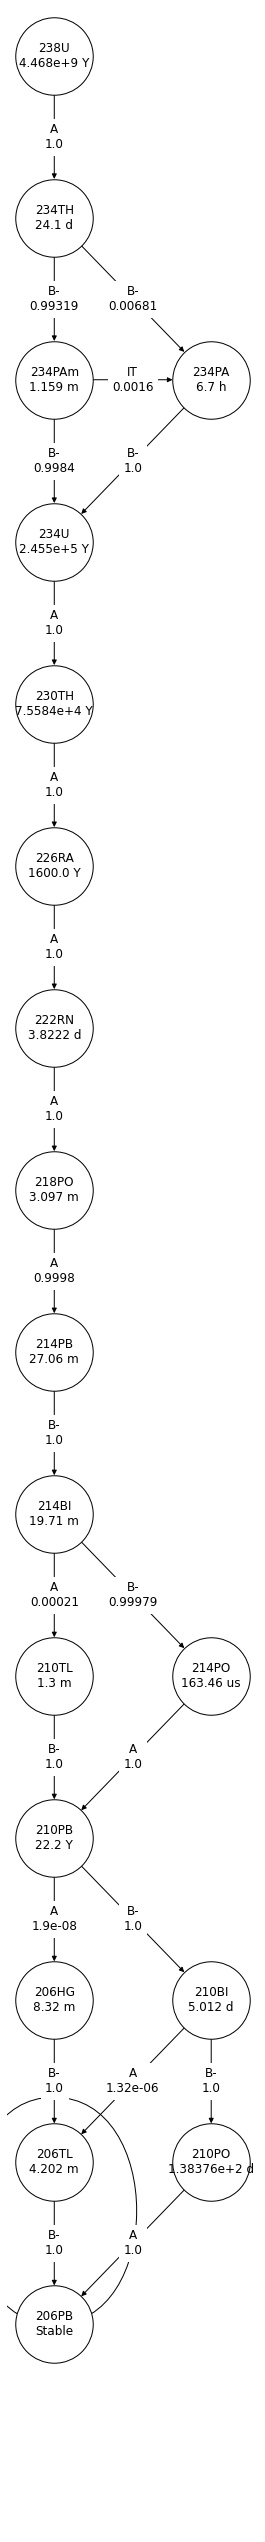

In [3]:
ancestor = '238U'
df_all = lc_pd_dataframe('fields=decay_chain&nuclides=' + ancestor)
nuc =  Nuclide(ancestor+'_0',df_all)
fig = nuc.plot()[0]
#fig.savefig(ancestor+'.svg', format='svg')

<div class="alert alert-block alert-success" style="font-weight:bold">
Radiation intensities vs energy for a given nuclide decay
</div>
This allows to select which radiation type and energy range is suited to detect a nuclide

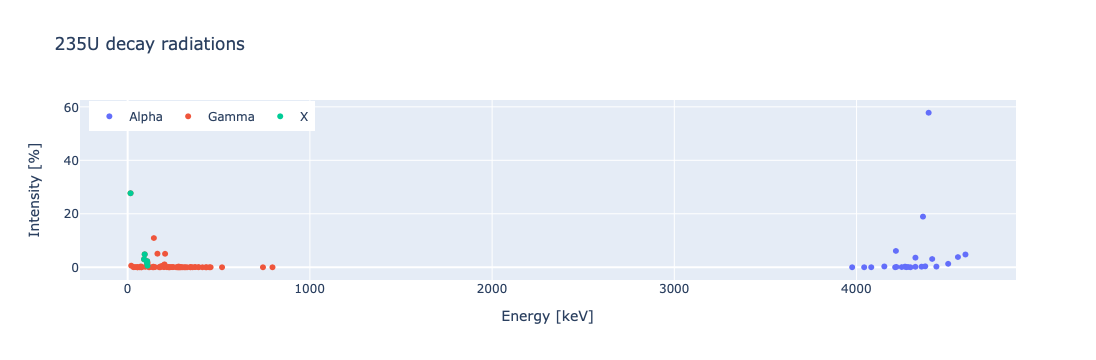

In [4]:
nucid = '235U'
energies = []
intensities = []
labels = []
for r in ['a','g','x','bp','bm']:
    
    try: df = lc_pd_dataframe('fields=decay_rads&nuclides=' + nucid + '&rad_types='+r).query('p_energy==0')
    except: continue
    # if beta, take the mean energy
    energies.append(df.mean_energy if r.startswith('b') else df.energy)
    intensities.append(df.intensity_beta if r.startswith('b') else df.intensity)
    labels.append(r)

if (PLOTLY):
    fig = go.Figure()
    for e,i,l in zip(energies,intensities,labels):
        l = 'Alpha' if l == 'a' else 'Gamma' if l == 'g' else 'X' if l =='x' else 'Beta'
        fig.add_trace(go.Scatter(x=e, y = i, mode="markers",name=l))
        
    fig = display_fig(fig, nucid + " decay radiations", "Energy [keV]", "Intensity [%] ")
    fig.update_layout(legend = dict(orientation='h',yanchor='top',y=0.99,xanchor='left',x=0.01))
    fig.show()

else:
    for e,i,l in zip(energies,intensities,labels):
        plt.scatter(e, i, label = l) 
    plt.legend() 
    plt.show()

<div class="alert alert-block alert-success" style="font-weight:bold">
Decay Chain analysis
</div>
For a given nuclide, describes its decay chains. For each link (parent-daughter decay) gives the counts build-up of the most intense photon. The same photon emission might be present in more than one link, but it will have different branching ratios and different counts build-up.
<br>
To use another type of radiation, change the <code>radiation_type = 'g'</code>. Allowed values are: a, bp, bm, x
<br>
<br>

The summing over all links (decays) leading to a give nuclide will be shown in a further example<br>
The function could be generalised by looping an all radiation types to find the best radiation for each decay


Normalization check 1.00000248 

3 chains
* 99MO -> 99TCm -> 99RU	Branching ratio 3.248e-05
* 99MO -> 99TCm -> 99TC -> 99RU	Branching ratio 0.87777
* 99MO -> 99TC -> 99RU	Branching ratio 0.1222


* 99MO -> 99TCm -> 99TC -> 99RU	Branching ratio 0.87777


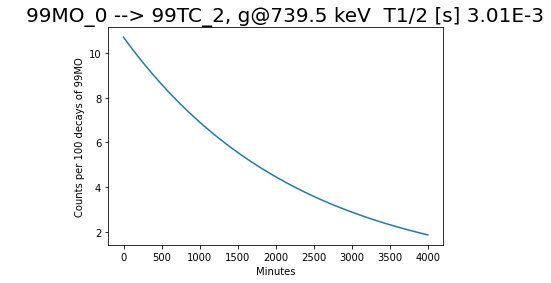

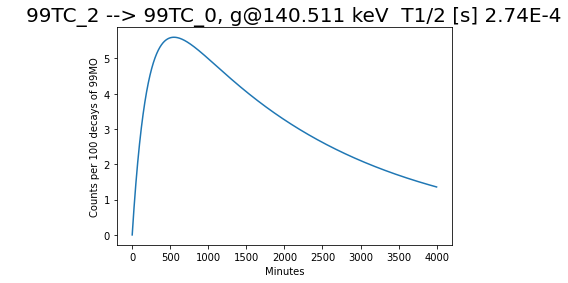

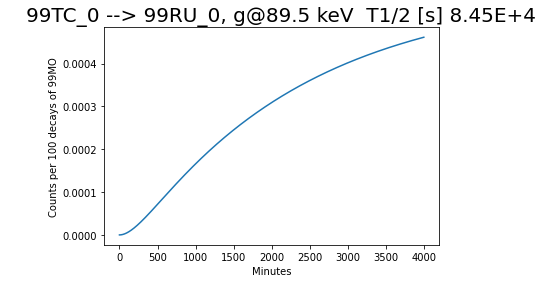

* 99MO -> 99TC -> 99RU	Branching ratio 0.1222


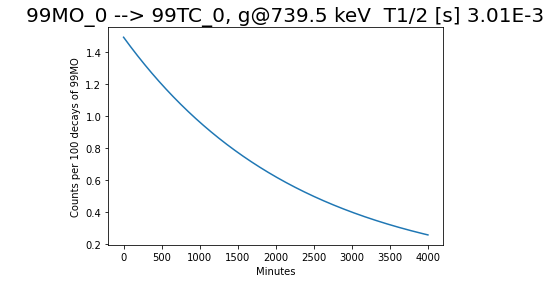

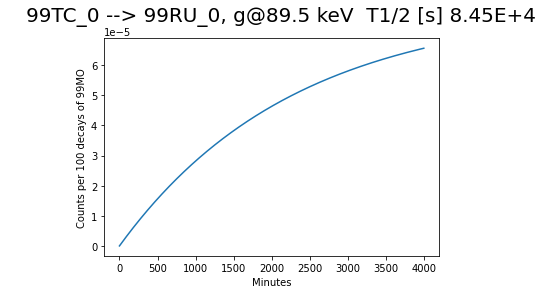

* 99MO -> 99TCm -> 99RU	Branching ratio 3.248e-05


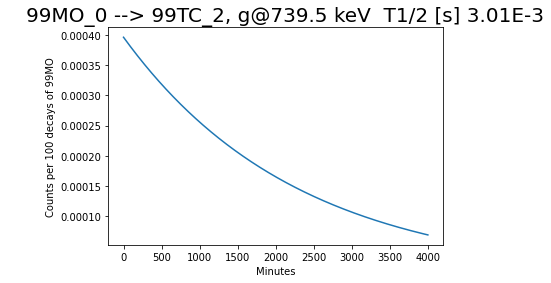

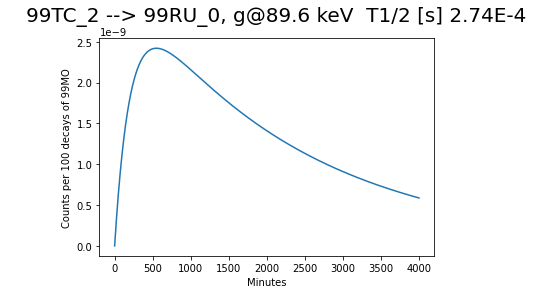

In [5]:
# using plotly might take too much resources
PLOTLY = False

storage = {}
storage_by_dau = {}

# start from
start_nucid = '99MO'#'233U'  # '135I'   # '99MO'#
delta_t = minutes
tot_intervals = 4000 
# cut-off for irrelevant decay chains 
branching_ratio_threshold = "1.E-9"
# radiation type to be analysed
radiation_type = 'g'
# radiation energy-range of interest (keV)
energy_low = 0
energy_up = 10000
process_nuclide(start_nucid, True , storage , storage_by_dau)

<div class="alert alert-block alert-success" style="font-weight:bold">
Bateman solution
</div>
For the decay chain above, gives number of atoms vs time for each nuclide, summed over all chains, 
as well as the most intense photon emission by parent

It uses the dictionary <code>storage</code> previously filled

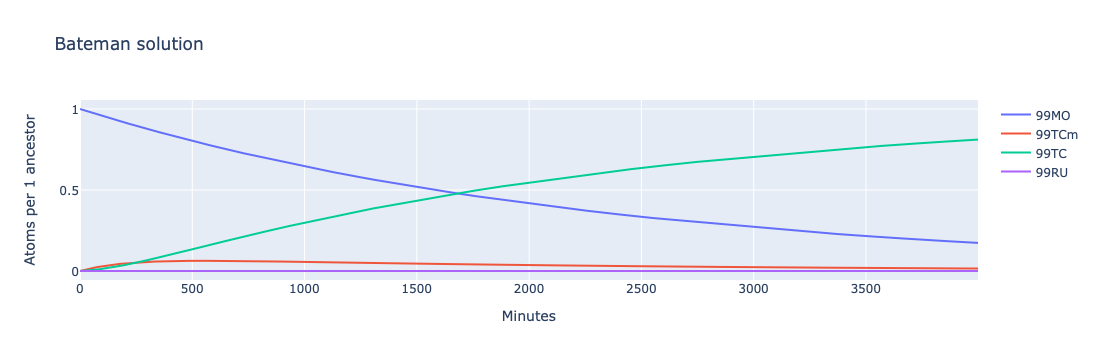

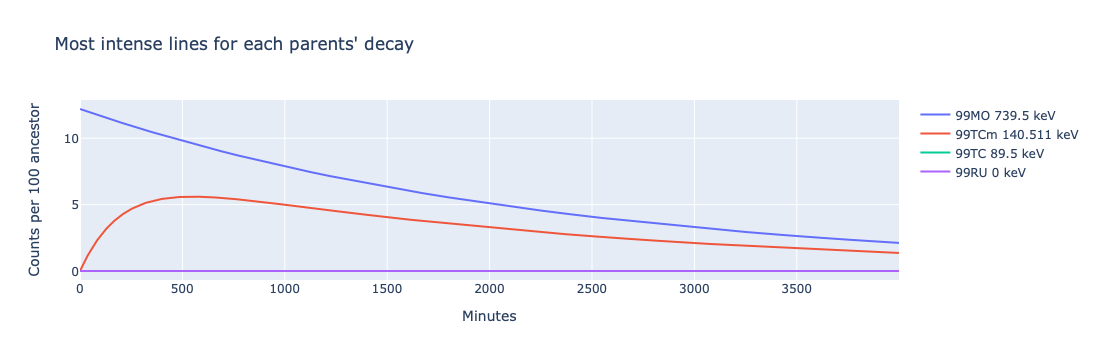

In [6]:
PLOTLY = True
if(PLOTLY):
    fig_a = go.Figure()
    fig_b = go.Figure()
    for k in storage.keys():
        if(k=='times'): continue
        lbl = k.replace('_0','')
        lbl = re.sub('_+[\d]+', 'm',  lbl)
        fig_a.add_trace(go.Scatter(x=storage['times'], y = storage[k]['bateman'], mode="lines",name=lbl))
        fig_b.add_trace(go.Scatter(x=storage['times'], y = storage[k]['intensities'], mode="lines",name=lbl +  ' ' + str(storage[k]['energy']) + ' keV'))

    display_fig(fig_a, "Bateman solution",time_label(delta_t), "Atoms per 1 ancestor").show()
    display_fig(fig_b, "Most intense lines for each parents' decay",time_label(delta_t),"Counts per 100 ancestor").show()

else:
    for k in storage.keys():
        if(k=='times'): continue
        plt.scatter(storage['times'],storage[k]['bateman'], label = k) 
    plt.legend() 
    plt.show()
    
    for k in storage.keys():
        if(k=='times'): continue
        plt.scatter(storage['times'],storage[k]['intensities'], label = k +  ' ' + str(storage[k]['energy']) + ' keV' )
    plt.legend() 
    plt.show()

    
    


<div class="alert alert-block alert-success" style="font-weight:bold">
Total radiation by parent or daughter
</div>

The <code>storage</code> and <code>storage_by_dau</code> dictionaries stores the sum of the most intense photon by parent and bt daughter, respectively

One can change the radiation type by setting a different <code>radiation_type</code> in the Decay Chain Analysis cell



Total by parent


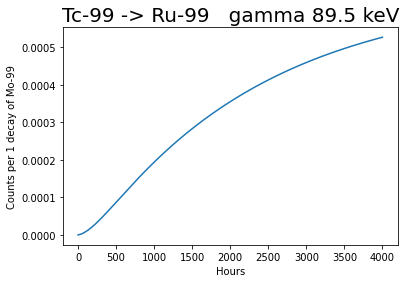

In [7]:
print('\nTotal by parent')
plt.plot(storage['times'], storage['99TC_0']['intensities'])
plt.title('Tc-99 -> Ru-99   gamma ' + str(storage['99TC_0']['energy']) + ' keV',fontsize = 20)
plt.xlabel('Hours')
plt.ylabel('Counts per 1 decay of Mo-99')

plt.show()


Total by daughter


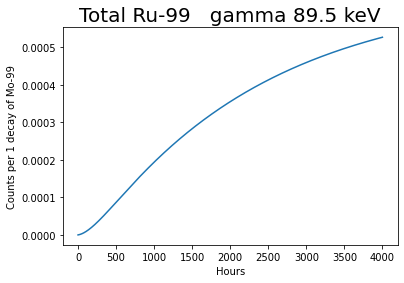

In [8]:
print('\nTotal by daughter')
plt.plot(storage['times'], storage_by_dau['99RU_0']['intensities'])
plt.title('Total Ru-99   gamma ' + str(storage_by_dau['99RU_0']['energy']) + ' keV',fontsize = 20)
plt.xlabel('Hours')
plt.ylabel('Counts per 1 decay of Mo-99')
fig1 = plt.gcf()
plt.show()
#fig1.savefig("Sum.svg" , format="svg")

<div class="alert alert-block alert-success" style="font-weight:bold">
Miscellaneous examples
</div>



***Population Ratio***

This is a tentative way to infer the population ratio between two radioactive nuclides, that were mixed and left decaying

I choose more or less randomly Sn-135 and Mo-99. Run the previous 'decay chain analysis' case for each of the two ancestors and choose a suitable nuclide characterising the chain, as well as a suitable time interval

Then calculate the ratio of the most intense lines for a given intial ratio. Matching with the observed value gives the time of inital mixing. 
Varying the initial ratio gives a two dimensional surface of allowed time/mixing.

Below, only the case for a given mixing is produced



Normalization check 0.99999925 

3 chains
* 135SN -> 135SB -> 135TE -> 135I -> 135XEm -> 135CS -> 135BA	Branching ratio 0.00099425
* 135SN -> 135SB -> 135TE -> 135I -> 135XEm -> 135XE -> 135CS -> 135BA	Branching ratio 0.164713
* 135SN -> 135SB -> 135TE -> 135I -> 135XE -> 135CS -> 135BA	Branching ratio 0.834292


* 135SN -> 135SB -> 135TE -> 135I -> 135XE -> 135CS -> 135BA	Branching ratio 0.834292
* 135SN -> 135SB -> 135TE -> 135I -> 135XEm -> 135XE -> 135CS -> 135BA	Branching ratio 0.164713
* 135SN -> 135SB -> 135TE -> 135I -> 135XEm -> 135CS -> 135BA	Branching ratio 0.00099425
Normalization check 1.00000248 

3 chains
* 99MO -> 99TCm -> 99RU	Branching ratio 3.248e-05
* 99MO -> 99TCm -> 99TC -> 99RU	Branching ratio 0.87777
* 99MO -> 99TC -> 99RU	Branching ratio 0.1222


* 99MO -> 99TCm -> 99TC -> 99RU	Branching ratio 0.87777
* 99MO -> 99TC -> 99RU	Branching ratio 0.1222
* 99MO -> 99TCm -> 99RU	Branching ratio 3.248e-05


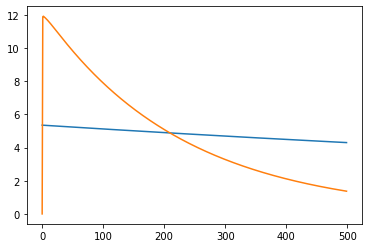

Count ratio 135XE_0 / 99TC_2


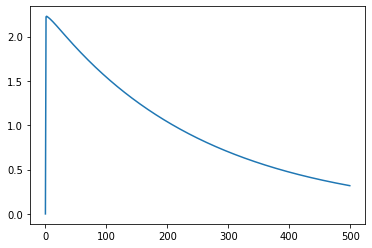

In [9]:
radiation_type = 'g'
delta_t = minutes
tot_intervals = 500

# large energy range for the analisys
energy_low = 0
energy_up = 5000

# the data storages
storage_a_par = {}
storage_a_dau = {}
ancestor_a = '135SN'
daughter_a = '135XE_0'

# process the chain until daughter_a
process_nuclide(ancestor_a, False, storage_a_par, storage_a_dau)

# repeat for the other ancestor
storage_b_par = {}
storage_b_dau = {}
ancestor_b = '99MO'
daughter_b = '99TC_2'
process_nuclide(ancestor_b, False, storage_b_par, storage_b_dau)

# set an initial ratio for the ancestors
ratio = 0.5

int_a =  [x * (1.-ratio) for x in storage_a_dau[daughter_a]['intensities'] ]
int_b =  [x * ratio for x in storage_b_dau[daughter_b]['intensities'] ]

res = []
for i in range(len(int_a)):
    if (i==0 or int_b[i] == 0): 
        res.append(0)
        continue
    res.append(int_a[i]/ int_b[i] )

plt.plot(storage_a_par['times'], int_b)
plt.plot(storage_a_par['times'], int_a)
plt.show()
print('Count ratio ' + daughter_a + ' / '+  daughter_b)

plt.plot(storage_a_par['times'], res)
plt.show()

**Energy flow in a decay chain**

The first picture is a 3D plot having Z and N as X and Y axis, like in a chart of nuclides, whilst on the Z there is the total energy of the decaying level,
<br>
this energy is the Atomic Mass in keV, plus the level's energy (0 for GS)


The second picture is a 2D plot with T<sub>1/2</sub>  on the X, and energy on the Y



99MO -> 99TCm -> 99TC -> 99RU	Branching ratio 0.87777
99MO -> 99TC -> 99RU	Branching ratio 0.1222
99MO -> 99TCm -> 99RU	Branching ratio 3.248e-05


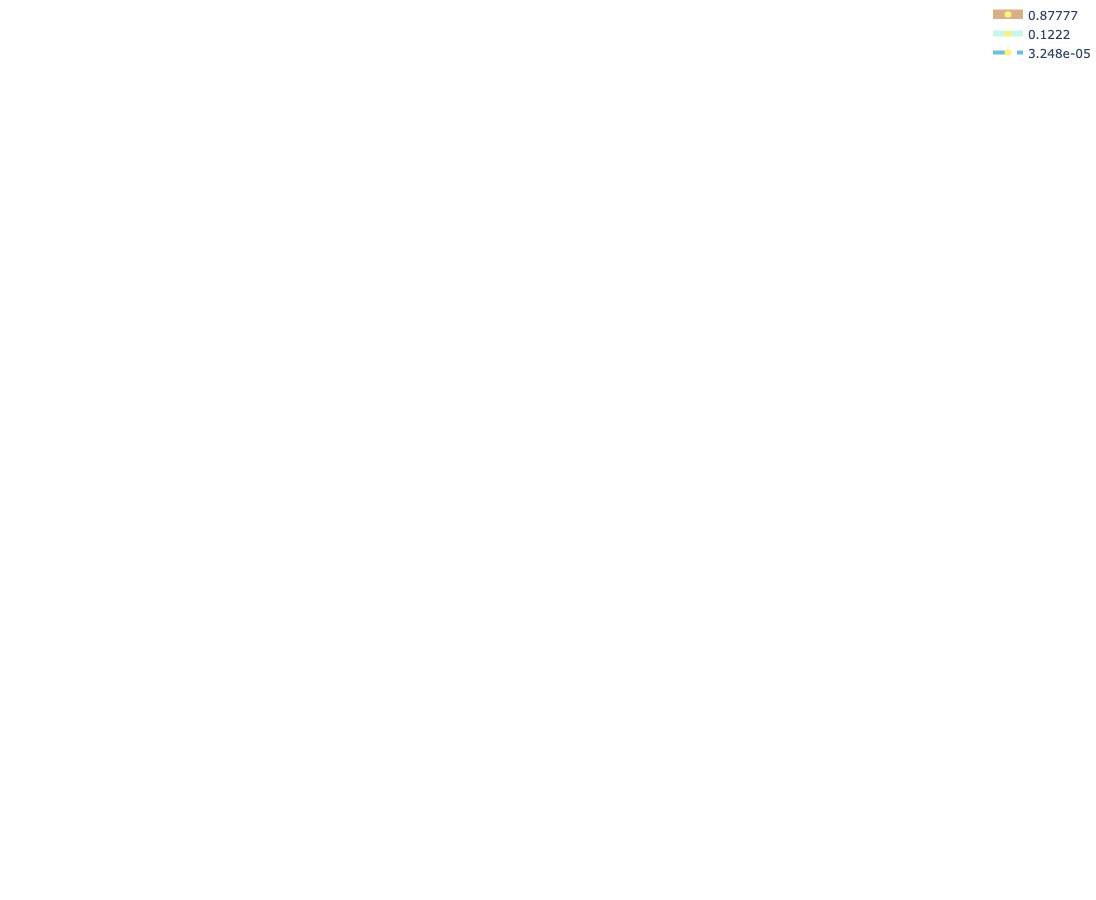

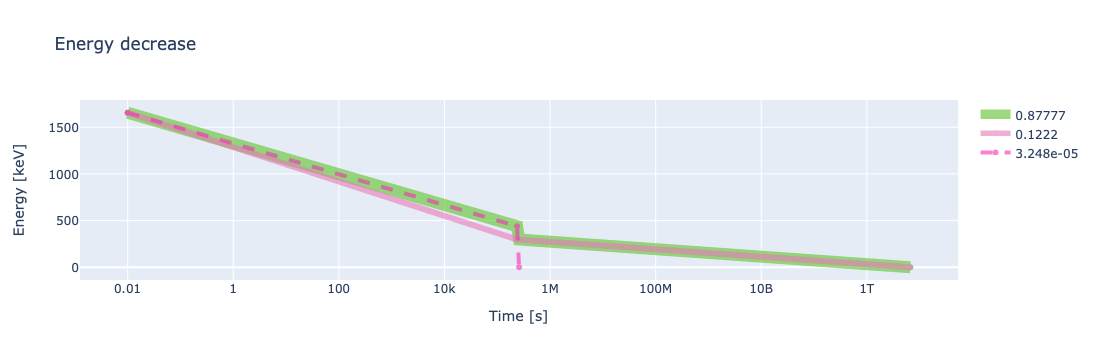

In [10]:
from random import randrange

MICRO_AMU_IN_KEV = 931494.10242 /1E6

fig = go.Figure()
fig3d = go.Figure()

start_nucid = '99mo'
#u9mo' #'238U'#'99mo''135I'#
df_all = lc_pd_dataframe('fields=decay_chain&nuclides='+start_nucid)
df_ends = df_all.query("dau_half_life==-1").sort_values(by='chain_br',ascending=False)

k = 0

def color(k):
    return 'rgb(' +  str(randrange(255)) +',' +  str(randrange(255)) +',' +str(randrange(255)) +')'

l_type = ['solid','solid','dash']
widths = [12,6,4]

for index, chain in df_ends.iterrows():
    print(chain_desc(chain))
    ancestor_nucids = chain['ancestor_full_ids'].split(' ')
    ancestor_idxs = chain['ancestor_idxs'].split(' ')

    energies = []
    half_lives = []
    z = []
    n = []
    txt = []
    for i, aidx in enumerate(ancestor_idxs):
        dm = ancestor_nucids[i].split('_')
        nuc_id = dm[0]
        lev_idx = dm[1]
        df_nuc = lc_pd_dataframe('fields=ground_states&nuclides='+nuc_id)
        df_link = df_all.query('idx=='+ aidx)
    
        if(not df_link.empty):
            half_lives.append(df_link.iloc[0]['par_half_life'])
        
        energy = df_nuc.iloc[0]['atomic_mass'] * MICRO_AMU_IN_KEV
        z.append(df_nuc.iloc[0]['z'])
        n.append(df_nuc.iloc[0]['n'])
        txt.append(df_nuc.iloc[0]['symbol'] + str(df_nuc.iloc[0]['z'] + df_nuc.iloc[0]['n'] ) + ('m'if int(lev_idx)>0 else '') )
       
        if(int(lev_idx)>0):
            df_lev = lc_pd_dataframe('fields=levels&nuclides='+nuc_id).query('idx=='+lev_idx)
            energy = energy + df_lev.iloc[0]['energy']
        energies.append(energy)   
    
    half_lives.append(chain['par_half_life'])
    df_nuc = lc_pd_dataframe('fields=ground_states&nuclides='+chain['dau_nucid'])
    energies.append(df_nuc.iloc[0]['atomic_mass'] * MICRO_AMU_IN_KEV)
    z.append(df_nuc.iloc[0]['z'])
    n.append(df_nuc.iloc[0]['n'])
  
    for i, hl in enumerate(half_lives):
        if(i==0): continue
        half_lives[i] = half_lives[i-1] + half_lives[i] 

    e0 = energies[-1]
    energies = [energies[i[0]]-e0 for i in enumerate(energies)]
   
    half_lives.insert(0, 0.01)

    fig.add_trace(go.Scatter(x=half_lives, y=energies, mode="markers+lines", name=chain['chain_br'], line=dict( width= widths[k],color=color(k),dash=l_type[k])))
    fig3d.add_trace(go.Scatter3d(
    x=n,
    y=z,
    z=energies,
    mode='markers+lines',
    text = txt,
    name=chain['chain_br'],
    marker=dict(
        size=7
        ,color=energies 
        ,colorscale='Viridis'         
    ),
    line=dict( width= widths[k],color=color(k),dash=l_type[k])
     
    ))
    k = k+1
    if(k>2): k=1

camera = dict(                          
   xaxis = dict( title='N'),
   yaxis = dict( title='Z'),
   zaxis = dict( title='Energy [keV]'),
)

eye_camera = dict(
    eye=dict(x=-2, y=-0.5, z=0.5)
)

fig3d.update_layout(scene=camera,scene_camera=eye_camera, margin=dict(l=0, r=0, b=0, t=0), height=900)
fig3d.update_traces(opacity=.6)
fig3d.show()

fig.update_xaxes(type="log")
fig.update_traces(opacity=.6)
#fig.update_yaxes(type="log")
#fig.update_layout( plot_bgcolor="white")
fig.update_layout( title="Energy decrease")
fig.update_xaxes(title_text='Time [s]')
fig.update_yaxes(title_text="Energy [keV]")
fig.show()